# sckit learn ( linear ) make regression lecture

## toyset

#### libraries and dependencies

first we import the libraries 

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np              

### defining our dataset (toyset)

now, compute the sample data and use 20 features on this case

In [3]:
samples = 1000
features = 20
X, y = sklearn.datasets.make_regression(samples, features,
                                        noise =1 , random_state = 42 ) # where X are my entry points and y my ouptut




In [5]:
print(X.shape,y.shape)

(1000, 20) (1000,)


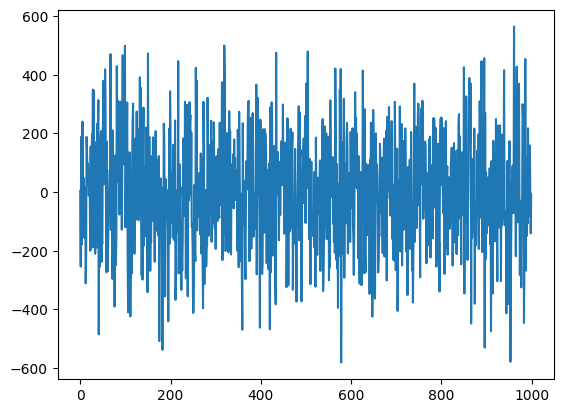

In [6]:
plt.plot(y) # print the ouput wh/ ourder
plt.show() #


its useful sort the output 

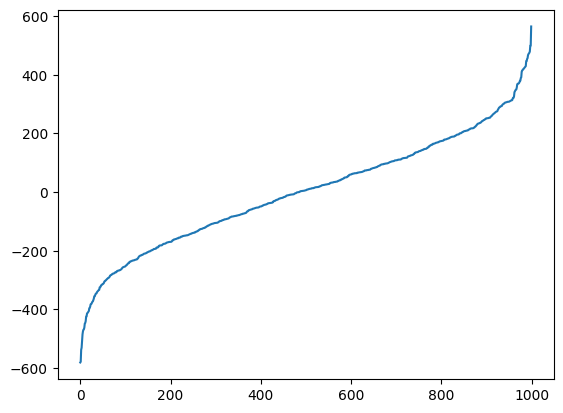

In [7]:
plt.plot(np.sort(y)) 
plt.show() # this isnt lineal #


we can print a headmap 

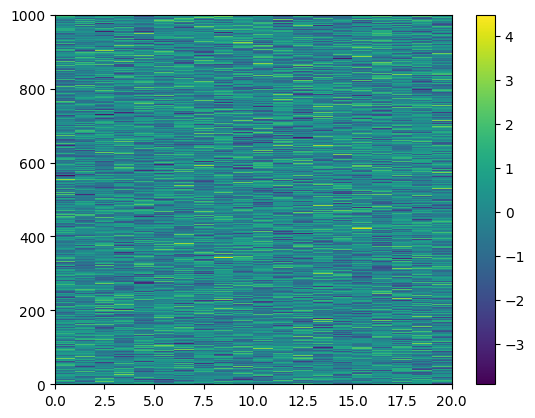

In [8]:
plt.pcolormesh(X) # this doenst have sort
plt.colorbar()
plt.show()

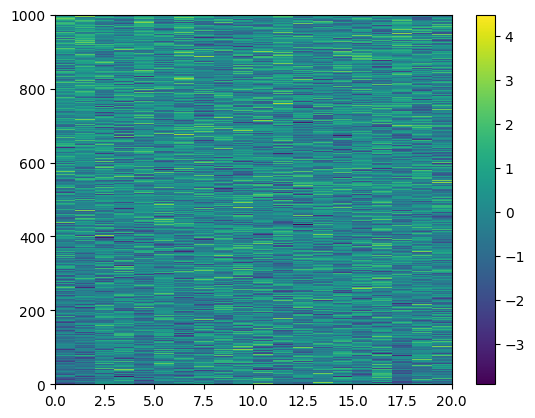

In [9]:
ind= np.argsort(y) # return index
# here we index the vector
plt.pcolormesh(X[ind]) # sorting about the index of y
plt.colorbar()
plt.show()

### defining the analytic alpha method

In [10]:

def mincua_reg(X,y,lam_ = 1e-3): # fit and optimization
    alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha


We now define a **function to compute the regression coefficients** analytically.  
This uses the **normal equation**:

$$
\boldsymbol{\alpha} = (X^{T}X + \lambda I)^{-1}X^{T}y
$$

where:
- \( X \) → feature matrix  
- \( y \) → target vector  
- ($$\lambda$$ \) → small regularization term (to stabilize inversion when $$( X^T X )$$ is nearly singular)

This approach corresponds to **Ridge Regression** when $$( \lambda > 0) $$ ,  
and to standard **Ordinary Least Squares (OLS)** when $$ ( \lambda = 0 )$$.



In [11]:
alpha = mincua_reg(X,y)  #inference about ¿?

print(alpha)

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


now, we compute and print the absolute value for the resulting parameter vector $$( \boldsymbol{\alpha} ).$$ , to see the correlation for each coefficient 

<StemContainer object of 3 artists>

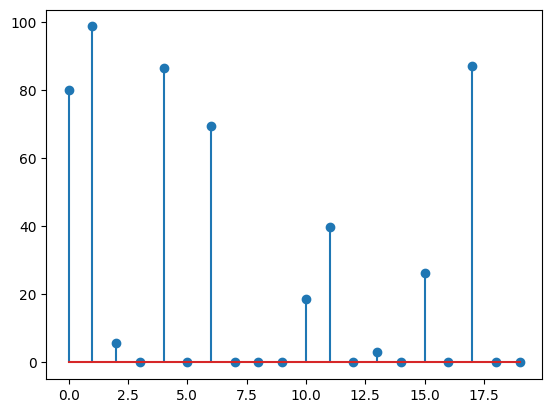

In [12]:
plt.stem(np.arange(len(alpha)),np.abs(alpha))

### computing prediction

now, compute the prediciton using the weights seeing on analytic alpha method

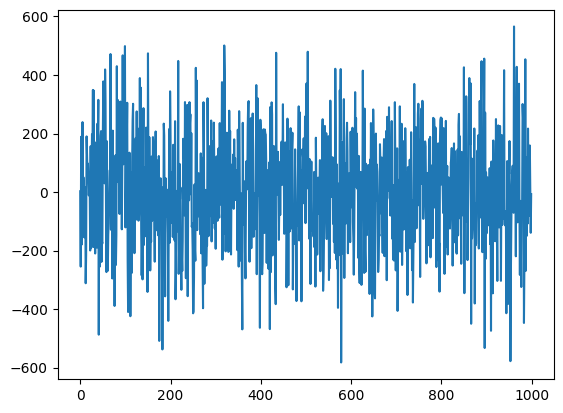

In [13]:
y_pred  = X.dot(alpha) # performs the linear transformation
plt.plot(y_pred)
plt.show()

in order to see the prediction and ther convergence, we need to sort using our index predifenided sorting the output 

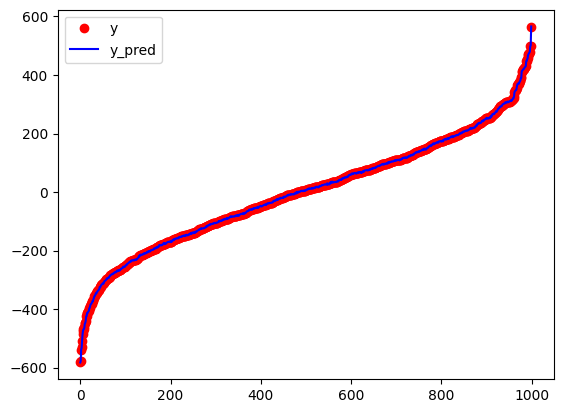

In [14]:
plt.plot(y[ind],'o' ,c='r',label = 'y' ) # what it means the 'o' here
plt.plot(y_pred[ind], c='b',label = 'y_pred' )
plt.legend()
plt.show()

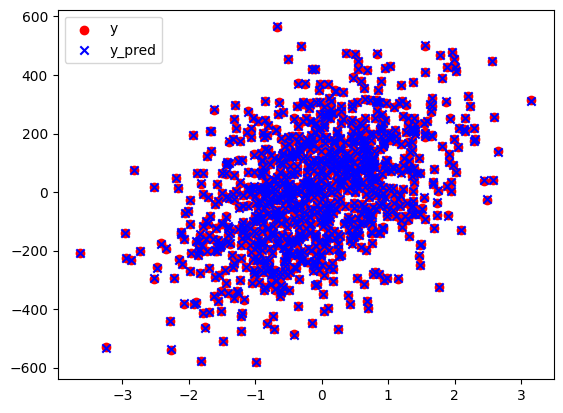

In [30]:
plt.scatter(X[ind,0], y[ind], marker='o', c='r', label='y')   # true values
plt.scatter(X[ind,0], y_pred[ind], marker='x', c='b', label='y_pred')  # predictions
plt.legend()
plt.show()


also , its usefull see the residuals: histogram + scatter (pred vs residual)


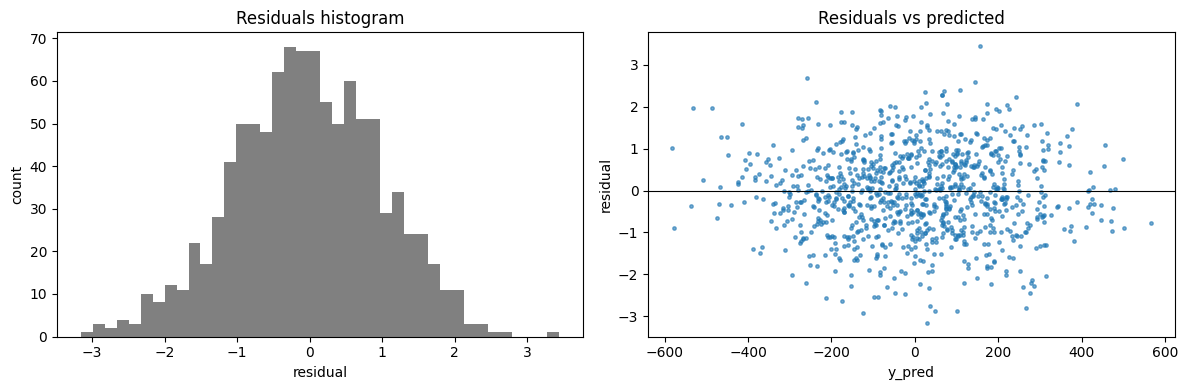

In [31]:
residuals = y - y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(residuals, bins=40, color='gray')
plt.title('Residuals histogram')
plt.xlabel('residual')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.scatter(y_pred, residuals, s=6, alpha=0.6)
plt.axhline(0, color='k', lw=0.8)
plt.title('Residuals vs predicted')
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.tight_layout()
plt.show()

### Model evaluation and some notes


finally, we can evalute using the MSE and R2

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = sklearn.metrics.mean_squared_error(y, y_pred)
mae =  sklearn.metrics.mean_absolute_error(y, y_pred)
r2 = sklearn.metrics.r2_score(y, y_pred)
print(f'MSE: {mse:.4e},  MAE: {mae :4f}, R²: {r2:.4g}')



MSE: 1.0195e+00,  MAE: 0.808518, R²: 1



The residual analysis and error metrics confirm that the **analytical linear regression model** fits the toy dataset exceptionally well.

- The **residual histogram** is approximately symmetric and centered near zero → residuals have no systematic bias.
- The **residuals vs. predicted** scatter plot shows random dispersion around the zero line → no visible pattern or heteroscedasticity.
- The **$R^2 = 1.0$** score indicates that the model explains nearly all the variance in the target variable.
- Both **MSE ≈ 1.0** and **MAE < 1.0** are extremely small, reinforcing the excellent fit.

This outcome is expected because:
- The dataset is **synthetic and purely numerical**, generated under **linear relationships** between features and target.
- Thus, the analytical model captures the true underlying function almost perfectly.

The model generalizes perfectly on this toy set because the data follows a **linear, noise-free structure**, making it ideal for demonstrating the mechanics of Ordinary Least Squares regression.


lets see some different case 

## fetch california housing data set test

In [16]:
housing = sklearn.datasets.fetch_california_housing()


In [17]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


proceed printing the input and output data

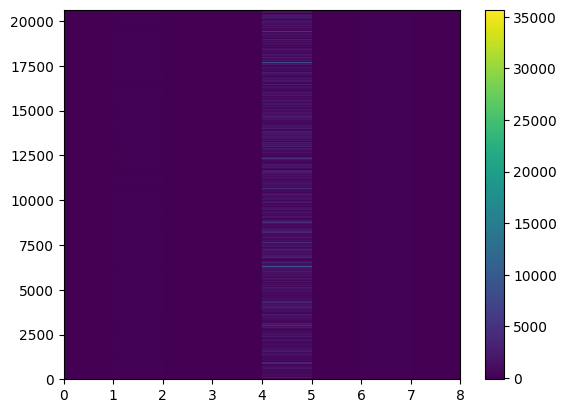

In [18]:
XHousing = housing.data
yHousing = housing.target
plt.pcolormesh(XHousing)
plt.colorbar()
plt.show()

lets sort the ouptut

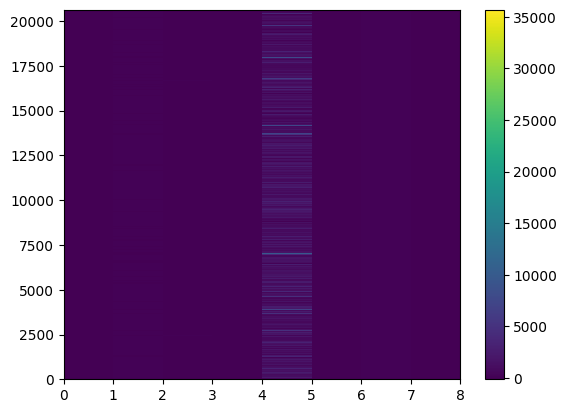

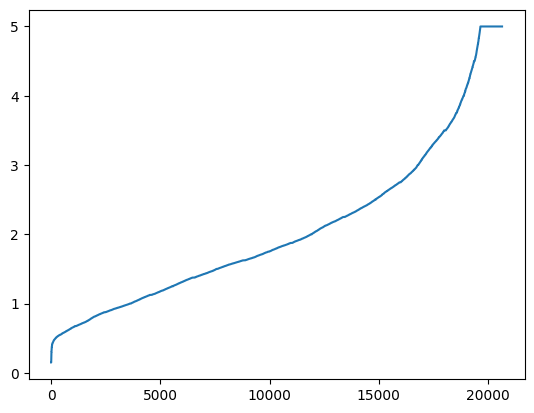

In [19]:
ind_ = np.argsort(yHousing)
plt.pcolormesh(XHousing[ind_])
plt.colorbar()
plt.show()
plt.plot(yHousing[ind_])
plt.show()

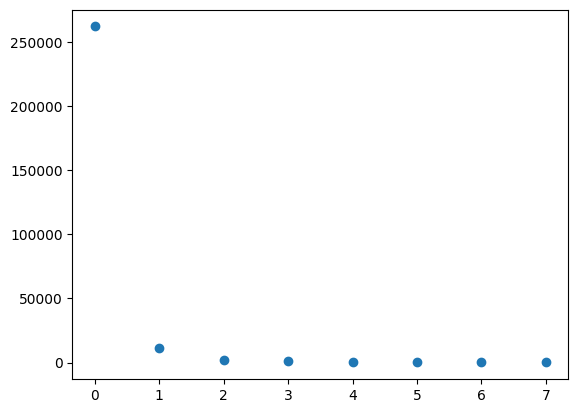

In [20]:
U,S ,Vh = np.linalg.svd(XHousing) # S, es la descomposicion lineal en bases ortogonales (espectro de la DB)
plt.scatter(np.arange(len(S)),S)
plt.show()

compute the weights 

In [21]:
alphaHousing = mincua_reg(XHousing,yHousing) 


and do the linear transformation

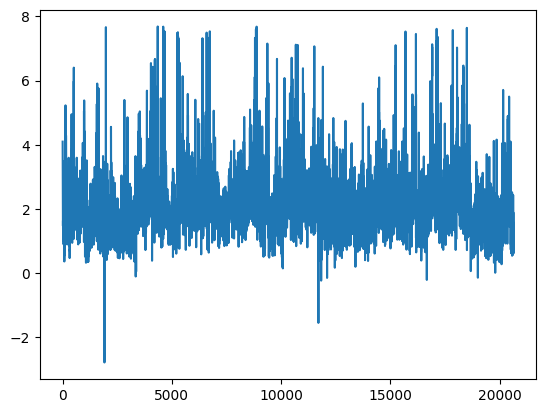

In [22]:
y_predHousing  = XHousing.dot(alphaHousing)
plt.plot(y_predHousing)
plt.show()

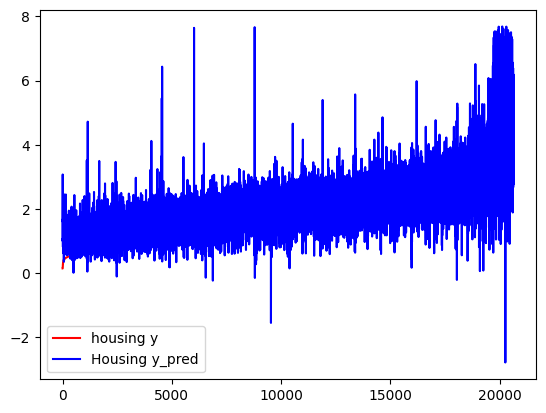

In [23]:
plt.plot(yHousing[ind_],c='r',label = 'housing y' ) # what it means the 'o' here
plt.plot(y_predHousing[ind_], c='b',label = 'Housing y_pred' )
plt.legend()
plt.show()

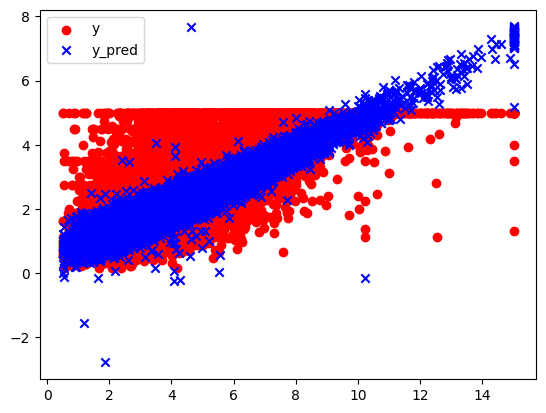

In [24]:
plt.scatter(XHousing[ind_,0], yHousing[ind_], marker='o', c='r', label='y')   # true values
plt.scatter(XHousing[ind_,0], y_predHousing[ind_], marker='x', c='b', label='y_pred')  # predictions
plt.legend()
plt.show()


now, compute numeric metrics for the housing prediction and show residual analysis


In [35]:
mse_h = sklearn.metrics.mean_squared_error(yHousing, y_predHousing)
mae_h = sklearn.metrics.mean_absolute_error(yHousing, y_predHousing)
r2_h = r2_score(yHousing, y_predHousing)
print(f'Housing results — MSE: {mse_h:.4e}, MAE: {mae_h:.4f}, R²: {r2_h:.4f}')


Housing results — MSE: 6.0421e-01, MAE: 0.5727, R²: 0.5462



These results indicate that the linear model captures over **half of the variance** in the data — a good performance for a purely linear baseline.


and see the residuals

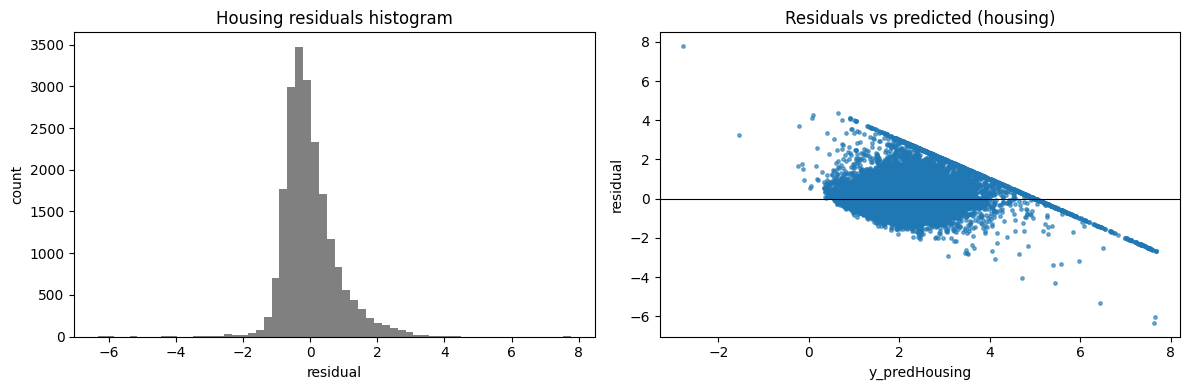

In [34]:
res_h = yHousing - y_predHousing
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(res_h, bins=60, color='gray')
plt.title('Housing residuals histogram')
plt.xlabel('residual')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.scatter(y_predHousing, res_h, s=6, alpha=0.6)
plt.axhline(0, color='k', lw=0.8)
plt.title('Residuals vs predicted (housing)')
plt.xlabel('y_predHousing')
plt.ylabel('residual')
plt.tight_layout()
plt.show()



- Residuals are centered around zero → unbiased predictions on average.  
- However, variance increases with predicted value (heteroscedasticity).  
- Histogram shows wide spread → data exhibits non-linear behavior not captured by OLS.

## conclusions 


The analytical linear regression provides a **strong baseline** for the housing dataset.  
It models the main trend between socio-economic features and house value,  
but **non-linear effects remain unexplained**, motivating the use of regularized or non-linear models (e.g., Ridge, Lasso, or SGDRegressor).

As we can see, applying the analytical regression model to a real world, non-synthetic data set, such as the 'california Housing' data set,  isnt a great idea, given the noise, non-linear relations and real-sorld variability, so its ideal for testin regression generalization.
can inference that the linear model learns a meaningful linear approximation but struggles with non linear patterns and interactions (e.g geographic or socio-economic effects) 
